## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

#hide warning msgs
import warnings
warnings.filterwarnings('ignore')

#files to load
mouse_drug_data_load = "data/Mouse_metadata.csv"
clinical_trial_data_load = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_drug_data_load)
study_results = pd.read_csv(clinical_trial_data_load)

#Combine the data into a single dataset

complete_clinical_data = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview

complete_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
clinical_data = complete_clinical_data["Mouse ID"].value_counts()
clinical_data = len(clinical_data)
clinical_data
#check


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = complete_clinical_data.loc[complete_clinical_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
full_mice_set = pd.DataFrame(dup_mice)
full_mice_set


,0
0,g989


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = complete_clinical_data[complete_clinical_data['Mouse ID'].isin(dup_mice)==False]
clean_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df["Mouse ID"].value_counts()
clean_num_mice = len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_mean = complete_clinical_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_vol_mean

tumor_vol_median = complete_clinical_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_vol_median

tumor_vol_variance = complete_clinical_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_vol_variance

tumor_vol_std = complete_clinical_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_vol_std

tumor_vol_sem = complete_clinical_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_vol_sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

tumor_sum_stats = pd.DataFrame({"Mean": tumor_vol_mean,
                               "Median": tumor_vol_median,
                               "Variance": tumor_vol_variance,
                               "Std Dev": tumor_vol_std,
                               "SEM":tumor_vol_sem})
tumor_sum_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tum_vol_stats = complete_clinical_data.groupby('Drug Regimen')
sum_stats_agg_add = tum_vol_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_stats_agg_add


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

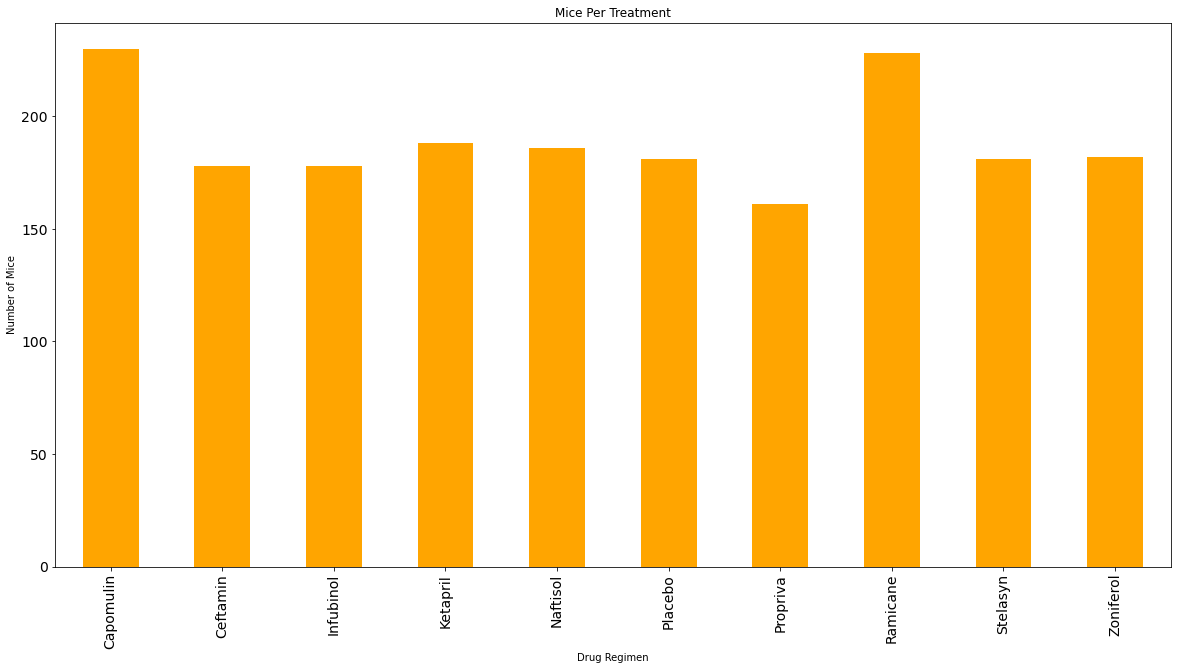

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_per_drug = complete_clinical_data.groupby(['Drug Regimen']).count()["Mouse ID"]
plot_mice = mice_per_drug.plot.bar(figsize=(20,10), color = "orange", fontsize = 14)
plt.title("Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Mice Per Treatment')

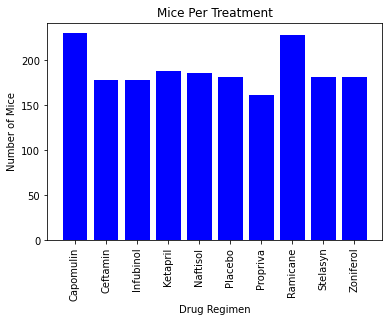

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice_per_drug = complete_clinical_data.groupby(['Drug Regimen']).count()["Mouse ID"]
#mice_per_drug
x_axis = np.arange(len(mice_per_drug))
plt.bar(x_axis, mice_per_drug, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drugs, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Per Treatment")


Text(0, 0.5, 'Sex')

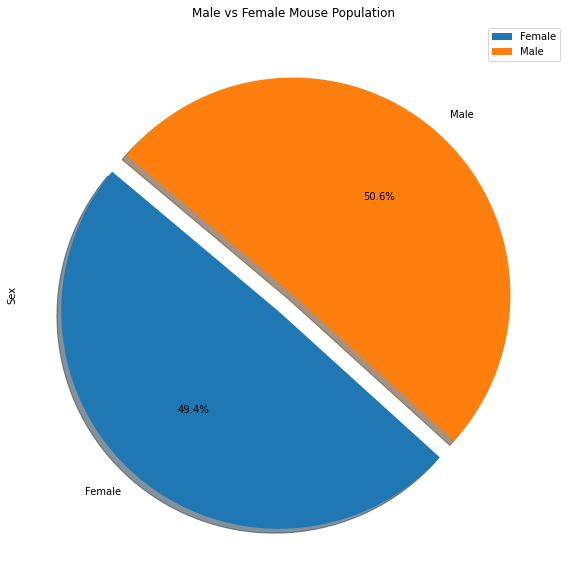

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get data
gender_groups = complete_clinical_data.groupby(['Sex']).count()['Mouse ID']
gender_groups = pd.DataFrame(gender_groups)
#gender_groups
explode= (0.1,0)

pie_chart = gender_groups.plot.pie(y='Mouse ID',figsize=(10,10), startangle=140, explode = explode, shadow= True, autopct="%1.1f%%")
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

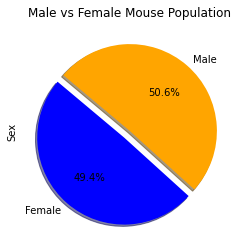

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#make labels
labels = ["Female","Male"]
#make sizes
sizes = [935, 958]
#colors
colors = ["Blue","Orange"]
#explode the chart
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = complete_clinical_data.loc[complete_clinical_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_df = pd.DataFrame(Capomulin_last)
Ramicane_df = pd.DataFrame(Ramicane_last)
Infubinol_df = pd.DataFrame(Infubinol_last)
Ceftamin_df = pd.DataFrame(Ceftamin_last)

Capomulin_merge = pd.merge(Capomulin_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_df, complete_clinical_data, on=("Mouse ID","Timepoint"),how="left")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
